In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


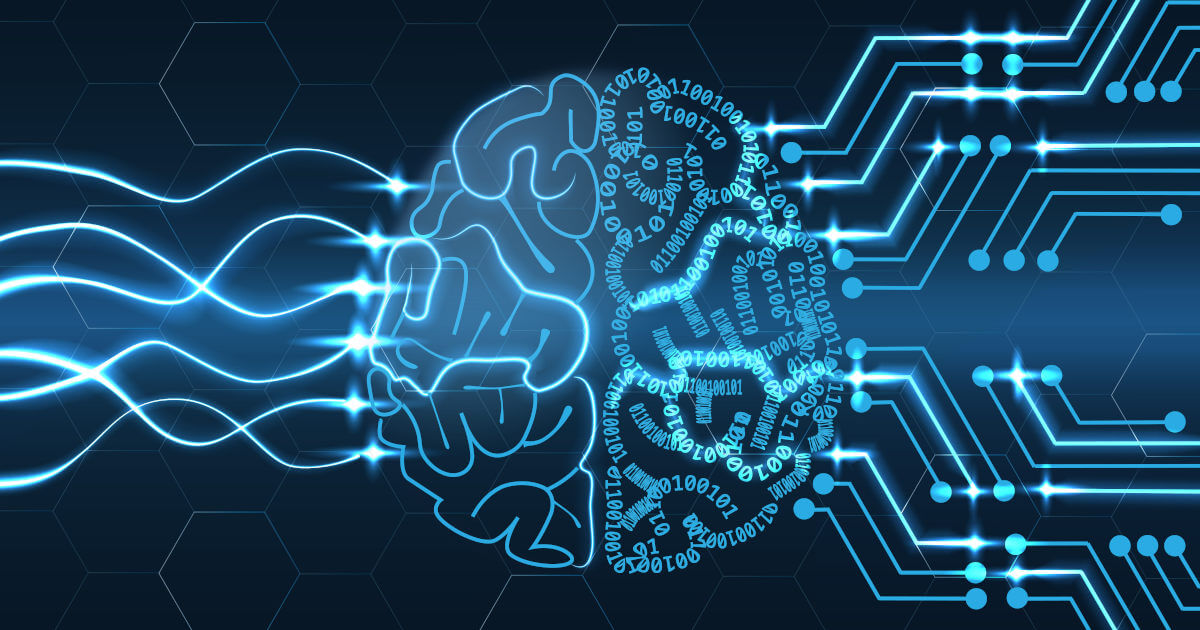

# ***2021 Kaggle Machine Learning & Data Science Survey : The Most Comprehensive Dataset Available On The State Of ML  And Data Science.***

### **Introduction:** 


*The Rapid Growth In The Industry Of Technology Is Now Resonating With Two Terms “Machine Learning” And “Data Science”. From 1st-year Computer Science students to big Organizations like Netflix, Amazon, Google, etc are running behind these two techniques.*

*Many platforms such as Kaggle, Medium, Google, Udemy, Codecademy, etc. offer Machine Learning and Data Science courses. Participants have access to a larger number of competitions from beginners to experts. Data Science is a immense pool of multiple data operations. These data operations also involve machine learning and statistics. Machine Learning algorithms are very much dependent on data. Machine learning is part of data science, but it is more of a process.* 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import glob
import warnings
import squarify
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib import ticker
import seaborn as sns
import gc 

In [3]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", dtype=object, low_memory=False)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

## *Q.What is your age (years)?*

*Age is just a factor when it comes to number of users who are programmers. As,we dive deeper into the world of technology the number of people who use kaggle will increse step by step because programming is future. THe most users of kaggle are of age 25-29 and the second most users are of age 18-21. The least users are of age 70+, which can be predicted.*

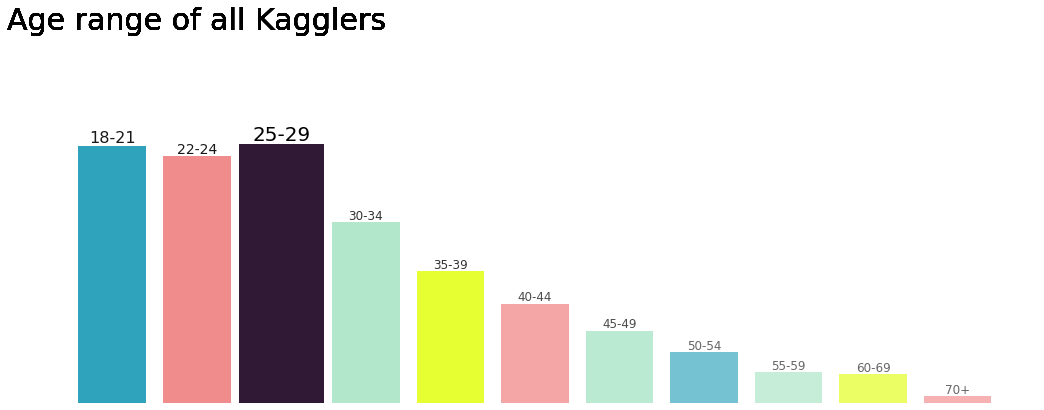

In [6]:
age = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']   
age_num = [4901,4694,4931,3441,2504,1890,1375,964,592,553,128]   

color = ['#189AB4','#F08080','#301934','#9FE2BF','#DFFF00','#F08080','#9FE2BF','#189AB4','#9FE2BF','#DFFF00','#F08080'] # Deciding the color
width = [0.8, 0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] # The Width
alpha = [0.9, 0.9, 1.0, 0.8, 0.8, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6] # The Opacity

fontsize= [16, 14, 20, 12, 12, 12, 12, 12, 12, 12, 12]
x_num = [0,1,2,3,4,5,6,7,8,9,10]
f, ax = plt.subplots(figsize=(18,5))
for i in range(11):
    plt.bar(x=age[i],height=age_num[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age[i],x=x_num[i],y=age_num[i],va='bottom',ha='center',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Age range of all Kagglers",x=1,y=7000,font='Helvetica 16 italic', fontsize=30, va='bottom',ha='center',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()

## *Q.What is your gender?*

*Gender is also a factor of users who do programming as gender does not define a person's skills and ability to slove a problem.As of present most programmers are men but due to increasing facilities to learn programming the number of women programmers are also steadily increasing day by day.*

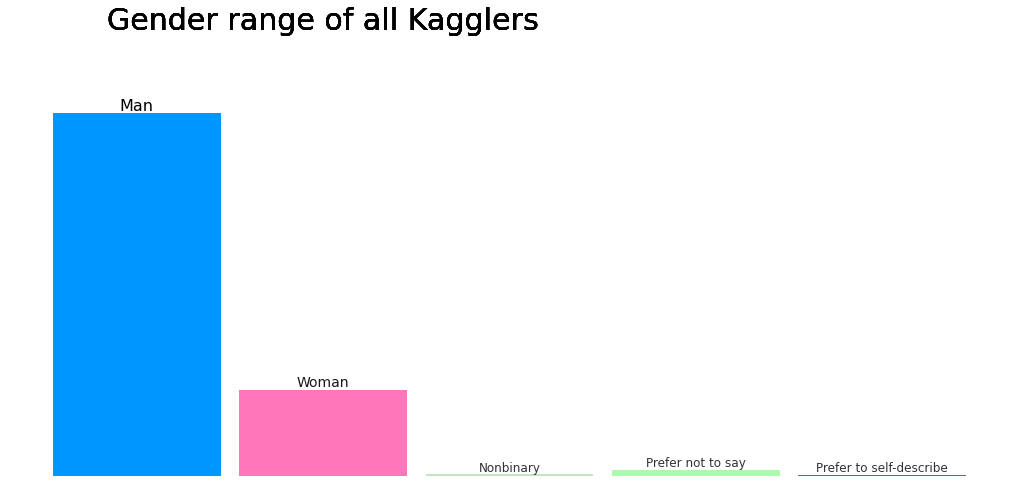

In [7]:
gender=['Man', 'Woman', 'Nonbinary', 'Prefer not to say','Prefer to self-describe']
gen_num=[20598,4890,88,355,42]

color=['#0096FF','#FF69B4','#AFE1AF','#98FB98','#673147']
width=[0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[1.0, 0.9, 0.8, 0.8, 0.8]

fontsize=[16, 14, 12, 12, 12]
x_num=[0, 1, 2, 3, 4]

f, ax = plt.subplots(figsize=(18,7))

for i in range(5):
    plt.bar(x=gender[i],height=gen_num[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=gender[i],x=x_num[i],y=gen_num[i],va='bottom',ha='center',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Gender range of all Kagglers",x=1,y=25000,font='Helvetica 16 italic', fontsize=30, va='bottom',ha='center',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()

## *Q.In which country do you currently reside?*

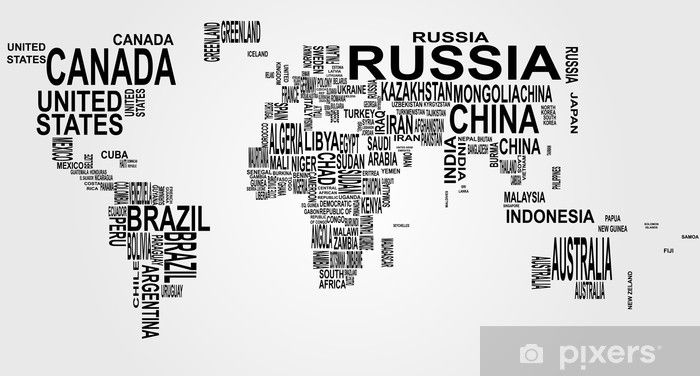

*India is number one kaggle user in the world.Increasing technology in India is giving exposure to many people to learn programming in easy and resourceful way. The least users are from Iraq and Ethiopia. The use of machine learning, data science, and other programming languages are and will increase day by day.*

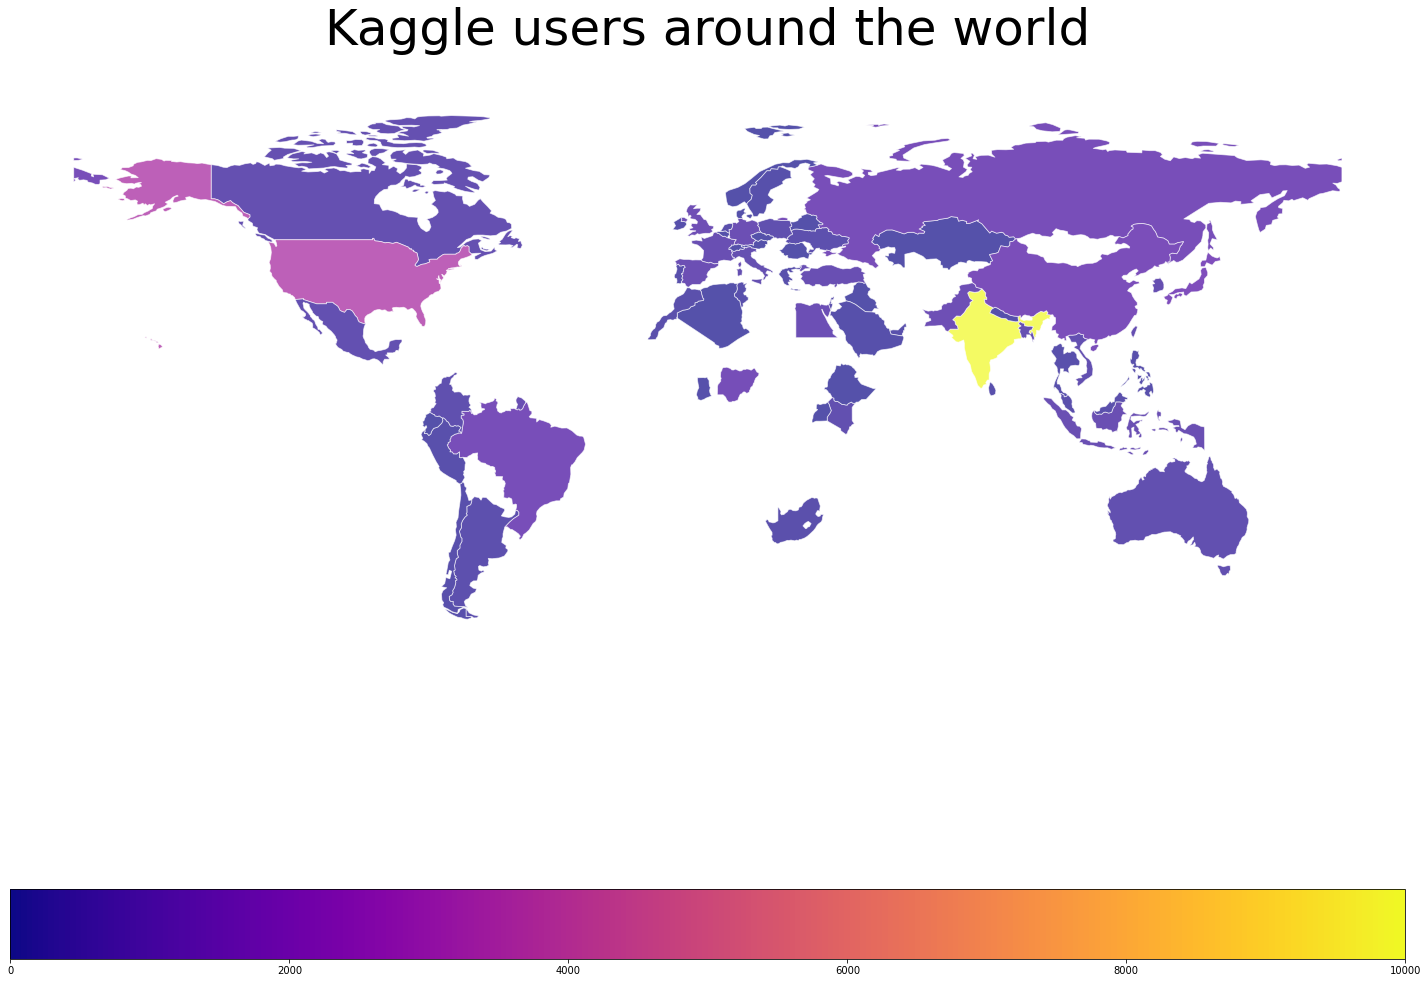

In [8]:
import geopandas as gpd

countries = ["Algeria","Argentina","Australia","Austria","Bangladesh","Belarus","Belgium","Brazil","Canada","Chile","China","Colombia",
             "Czechia","Denmark","Ecuador","Egypt","Ethiopia","France","Germany","Ghana","Greece","India","Indonesia","Iraq","Ireland",
             "Israel","Italy","Japan","Kazakhstan","Kenya","Malaysia","Mexico","Morocco","Nepal","Netherlands","Nigeria","Norway","Pakistan",
             "Peru","Philippines","Poland","Portugal","Romania","Russia","Saudi Arabia","South Africa","South Korea","Spain","Sri Lanka",
             "Sweden","Switzerland","Taiwan","Thailand","Tunisia","Turkey","Uganda","Ukraine","United Arab Emirates","United Kingdom",
             "United States of America","Vietnam"]

# Reading the geopandas data 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_data = countries # Passing the list of countries here
country_geo = list(world['name']) # The country list from the geopandas dataset

# List of all the values of population of Kagglers from each country
population = [44,182,264,51,317,51,65,751,331,102,814,225,63,48,50,482,43,401,470,99,102,7434,444,43,84,138,311,921,45,248,156,279,140,75,153,
           702,45,530,117,108,219,119,61,742,89,146,359,454,106,81,71,334,123,109,416,47,186,111,550,2650,277]

# Next we need to create a dataframe with lis_countries and lis_pop
our_country_analysis = pd.DataFrame(countries, columns=['Country'])
our_country_analysis['KagglePopulation'] = population

# Next, we are going to visualize this...
mapped = world.set_index('name').join(our_country_analysis.set_index('Country')).reset_index()

to_be_mapped = 'KagglePopulation'
vmin, vmax = 0,10000
fig, ax = plt.subplots(1, figsize=(25,30))

mapped.dropna().plot(column=to_be_mapped, cmap='plasma', linewidth=0.8, ax=ax, edgecolors='1', alpha=0.7)

ax.text(s="Kaggle users around the world",x=0,y=100,font='Courier New', fontsize=50,va='bottom',ha='center',color='k')
ax.set_axis_off()
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

gc.collect()
cbar = fig.colorbar(sm, orientation='horizontal', shrink= 1.0)

## *Q.What is the highest level of formal education that you have attained or plan to attain within the next 2years?*

*The highest percentage of programmers hold Master's degree and second highest percentage of programmers hold Bachelor's degree. As people nowadays start studying programming languague from high school they are getting proficient enough when they enter college/university. The least users hold professional doctorate.*

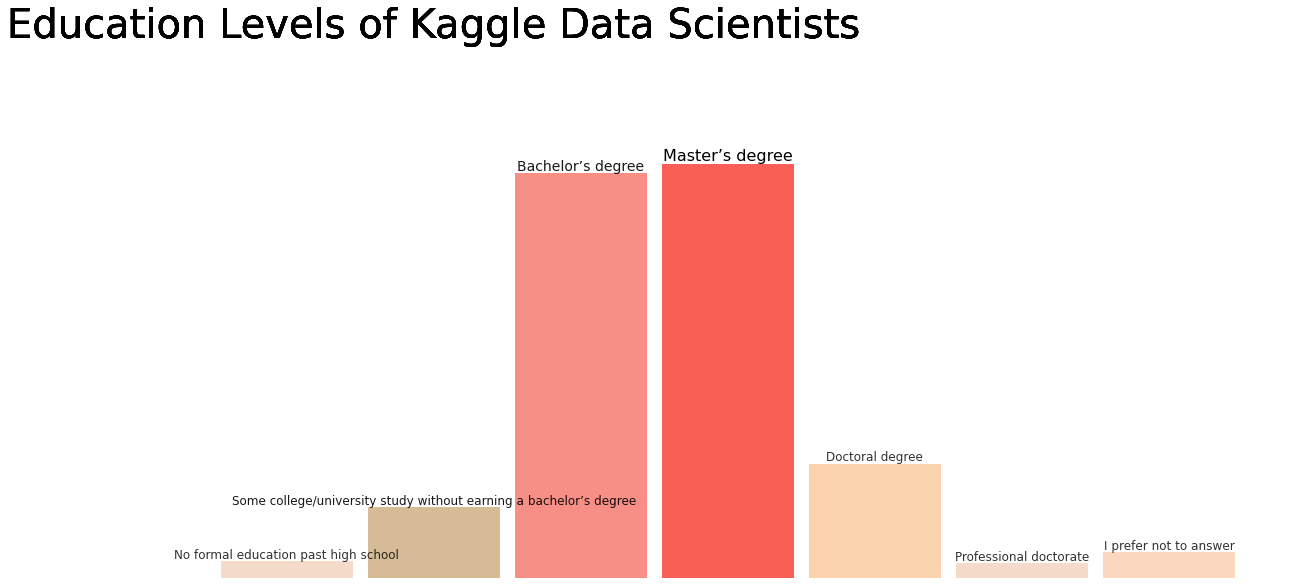

In [9]:
education=['No formal education past high school','Some college/university study without earning a bachelor’s degree','Bachelor’s degree','Master’s degree','Doctoral degree','Professional doctorate','I prefer not to answer']
edu_num=[417,1735,9907,10132,2795,360,627]

color=['#F2D2BD','#D2B48C','#F88379','#FA5F55','#FAC898','#F2D2BD','#FBCEB1']
width=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.8, 0.9, 0.9, 1.0, 0.8, 0.8, 0.8]

fontsize=[12, 12, 14, 16, 12, 12, 12]
x_num=[0, 1, 2, 3, 4, 5, 6]

f, ax = plt.subplots(figsize=(20,8))

for i in range(7):
    plt.bar(x=education[i],height=edu_num[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=education[i],x=x_num[i],y=edu_num[i],va='bottom',ha='center',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Education Levels of Kaggle Data Scientists",x=1,y=13000,font='Courier New', fontsize=40, va='bottom',ha='center',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()

## *Q.Select the title most similar to your current role (or most recent title if retired):*

*The most kaggle users are Students and least Kaggle users are Developer Relations/Advocacy.*

***“I believe that the integration of information technology in education will be further accelerated and that online education will eventually become an integral component of school education,“*** *says Wang Tao, Vice President of Tencent Cloud and Vice President of Tencent Education.*

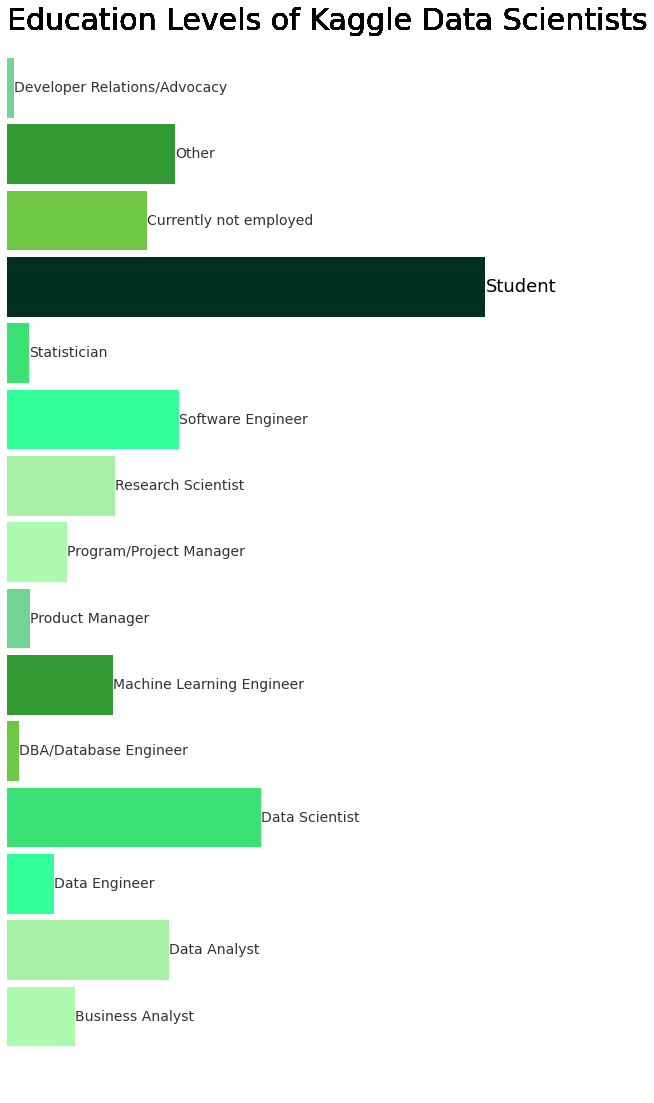

In [10]:
role=['Business Analyst','Data Analyst','Data Engineer','Data Scientist','DBA/Database Engineer','Machine Learning Engineer','Product Manager','Program/Project Manager','Research Scientist','Software Engineer','Statistician','Student','Currently not employed','Other','Developer Relations/Advocacy']
rol_num=[968,2301,668,3616,171,1499,319,849,1538,2449,313,6804,1986,2393,99]

color=['#98FB98','#90EE90','#00FF7F','#0BDA51','#4CBB17','#008000','#50C878','#98FB98','#90EE90','#00FF7F','#0BDA51','#023020','#4CBB17','#008000','#50C878']

height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.0, 0.8, 0.8, 0.8]

fontsize=[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 14, 14, 14]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

f, ax = plt.subplots(figsize=(9,20))

for i in range(15):
    plt.barh(y=role[i],height=height[i], width=rol_num[i], color=color[i], alpha=alpha[i])
    plt.text(s=role[i],y=x_num[i],x=rol_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Education Levels of Kaggle Data Scientists",x=0,y=15,font='Courier New', fontsize=30, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

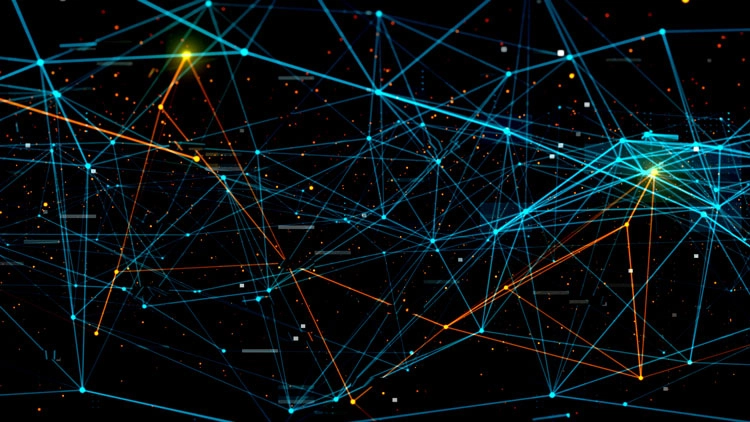

## *Q.For how many years have you been writing code and/or programming?*

*The Survey shows that the experience most users have is in between 1-3 years. In recent years the intrest in programming language is making more and more people enter the machine learning and data science field. There is less number of people who do not have programming experience.*

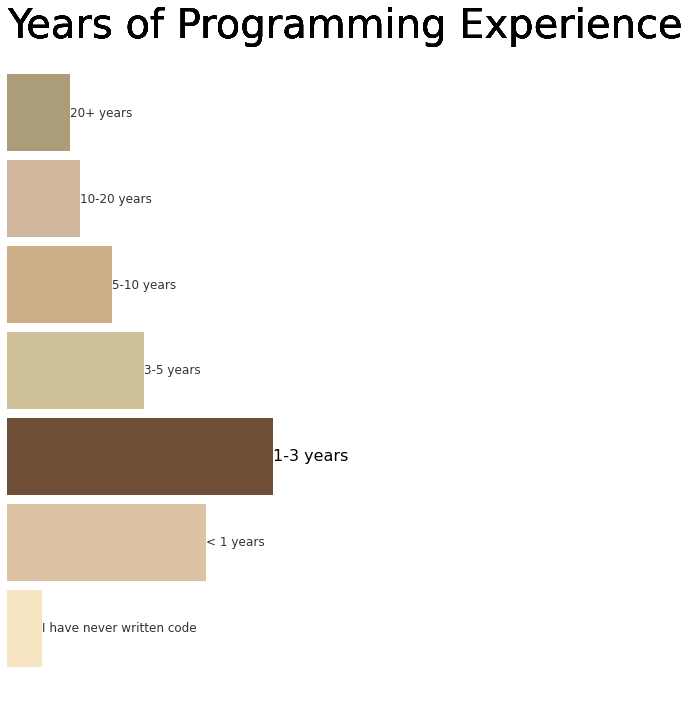

In [11]:
experience=['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']
exp_num=[1032,5881,7874,4061,3099,2166,1860]

color=['#F5DEB3','#D2B48C','#6F4E37','#C2B280','#C19A6B','#C4A484','#988558']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.8, 0.8, 1.0, 0.8, 0.8, 0.8, 0.8]

fontsize=[12, 12, 16, 12, 12, 12, 12]
x_num=[0, 1, 2, 3, 4, 5, 6]

f, ax = plt.subplots(figsize=(5,12))

for i in range(7):
    plt.barh(y=experience[i],height=height[i], width=exp_num[i], color=color[i], alpha=alpha[i])
    plt.text(s=experience[i],y=x_num[i],x=exp_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Years of Programming Experience",x=2,y=7,font='Courier New', fontsize=40, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()

 ## *Q.What programming languages do you use on a regular basis?*

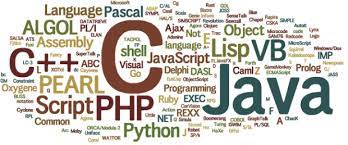

*The most popular and most used programming language is **Python**. The least used programming language is swift. Python is a easy to use programming language. Programming languages serve as set of instructions which direct computers how to behave and carry out tasks. Thanks to the increased reliance on, computers and electronic devices in today’s society, these languages play a crucial role in the everyday lives of people around the world.*

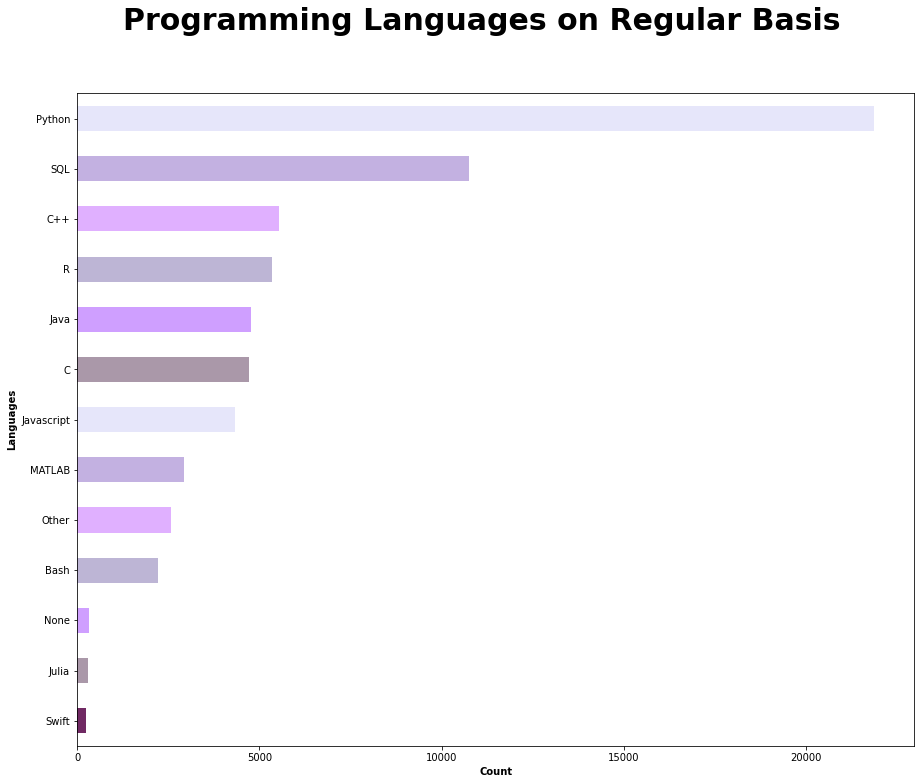

In [12]:
program = df[['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10','Q7_Part_11','Q7_Part_12', 'Q7_OTHER']]

program.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

f, ax = plt.subplots(figsize=(15,12))

program.count().sort_values(ascending=True).plot(kind='barh',color=['#702963','#AA98A9','#CF9FFF','#BDB5D5','#E0B0FF','#C3B1E1','#E6E6FA','#AA98A9','#CF9FFF','#BDB5D5','#E0B0FF','#C3B1E1','#E6E6FA'])

plt.xlabel('Count', weight='semibold', fontname = 'Georgia')
plt.ylabel('Languages', weight='semibold', fontname = 'Georgia')
plt.suptitle('Programming Languages on Regular Basis',fontsize=30,fontname = 'Georgia', weight='bold')


plt.show()

## *Q.What programming language would you recommend an aspiring data scientist to learn first?*

*The most popular programming language for aspiring data scientist is **Python**.It is easy to understand,use, and implement on real-time datasets. Mostly, Students prefer to easy to learn language and Python is easy.Python is a backend programming language which is best for beginners. Python is similar in many ways to Ruby, but is less wordy than other programming languages. The Python community is welcoming, well-maintained, and well-documented.*

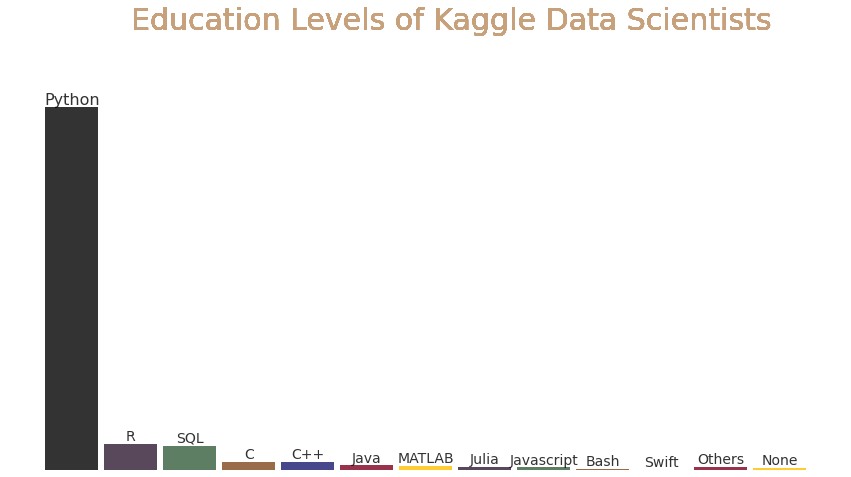

In [13]:
language=['Python','R','SQL','C','C++','Java','MATLAB','Julia','Javascript','Bash','Swift','Others','None']
lan_num=[20213,1445,1338,440,437,242,215,137,133,38,15,176,111]

color=['#000000','#301934','#355E3B','#80461B','#191970','#800020','#FFC000','#301934','#355E3B','#80461B','#191970','#800020','#FFC000']


fontsize=[16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


f, ax = plt.subplots(figsize=(15,7))

for i in range(13):
    plt.bar(x=language[i],width=0.9, height=lan_num[i], color=color[i], alpha=0.8)
    plt.text(s=language[i],x=x_num[i],y=lan_num[i],va='bottom',ha='center',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Education Levels of Kaggle Data Scientists",x=1,y=25000,font='Courier New', fontsize=30, va='center',ha='left',color='#C7A17B')
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

## *Q.Which of the following integrated development environments (IDE's) do you use on a regular basis?* 

*An IDE allows developers to start programming new applications quickly because multiple utilities don’t need to be manually configured and integrated as part of the setup process. IDEs are meant to save time, like intelligent code completion and automated code generation, which removes the need to type out full character sequences.*

*The most used Integrated Development Environment is **Jupyter Notebook**. The least used IDE is Vim/Emacs.*

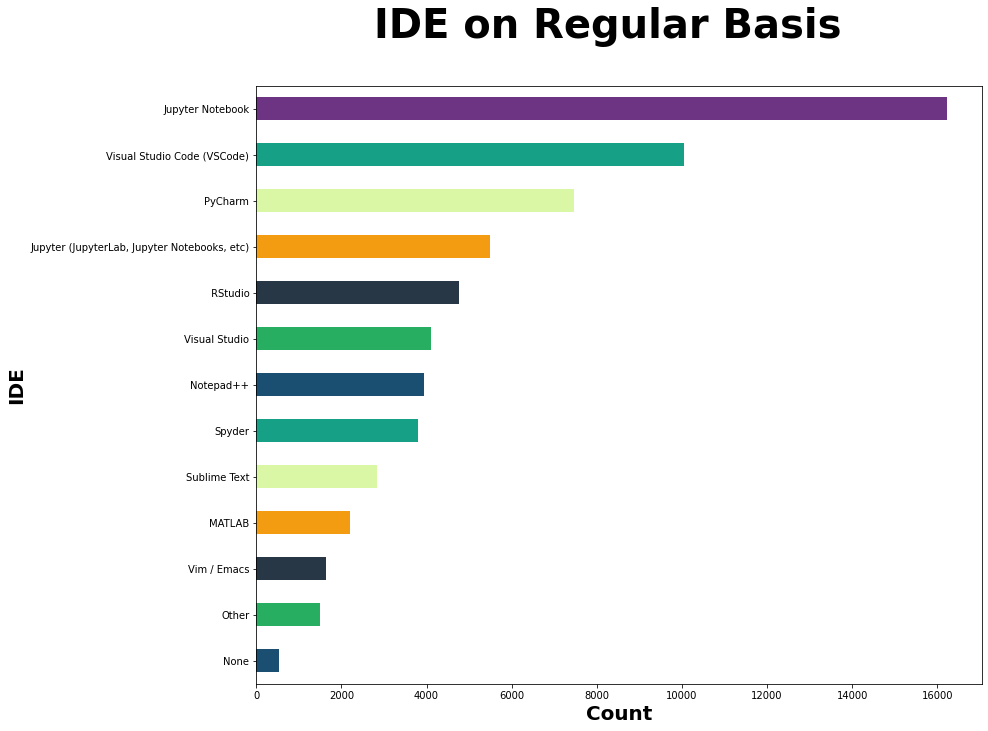

In [14]:
ides= df[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10','Q9_Part_11','Q9_Part_12', 'Q9_OTHER']]
ides.columns=['Jupyter (JupyterLab, Jupyter Notebooks, etc)',' RStudio','Visual Studio','Visual Studio Code (VSCode)','PyCharm','Spyder','Notepad++','Sublime Text','Vim / Emacs','MATLAB','Jupyter Notebook','None','Other']

f, ax = plt.subplots(figsize=(13,11))

c=['#1B4F72','#27AE60','#273746','#F39C12','#DAF7A6','#16A085','#1B4F72','#27AE60','#273746','#F39C12','#DAF7A6','#16A085','#6C3483']

ides.count().sort_values().plot(kind='barh',color=c)


plt.xlabel('Count', weight='semibold', fontname = 'Fixedsys',fontsize=20)
plt.ylabel('IDE', weight='semibold', fontname = 'Fixedsys',fontsize=20)
plt.suptitle('IDE on Regular Basis', fontname = 'Fixedsys',fontsize=40, weight='bold')


plt.show()


## *Q.Which of the following hosted notebook products do you use on a regular basis?*

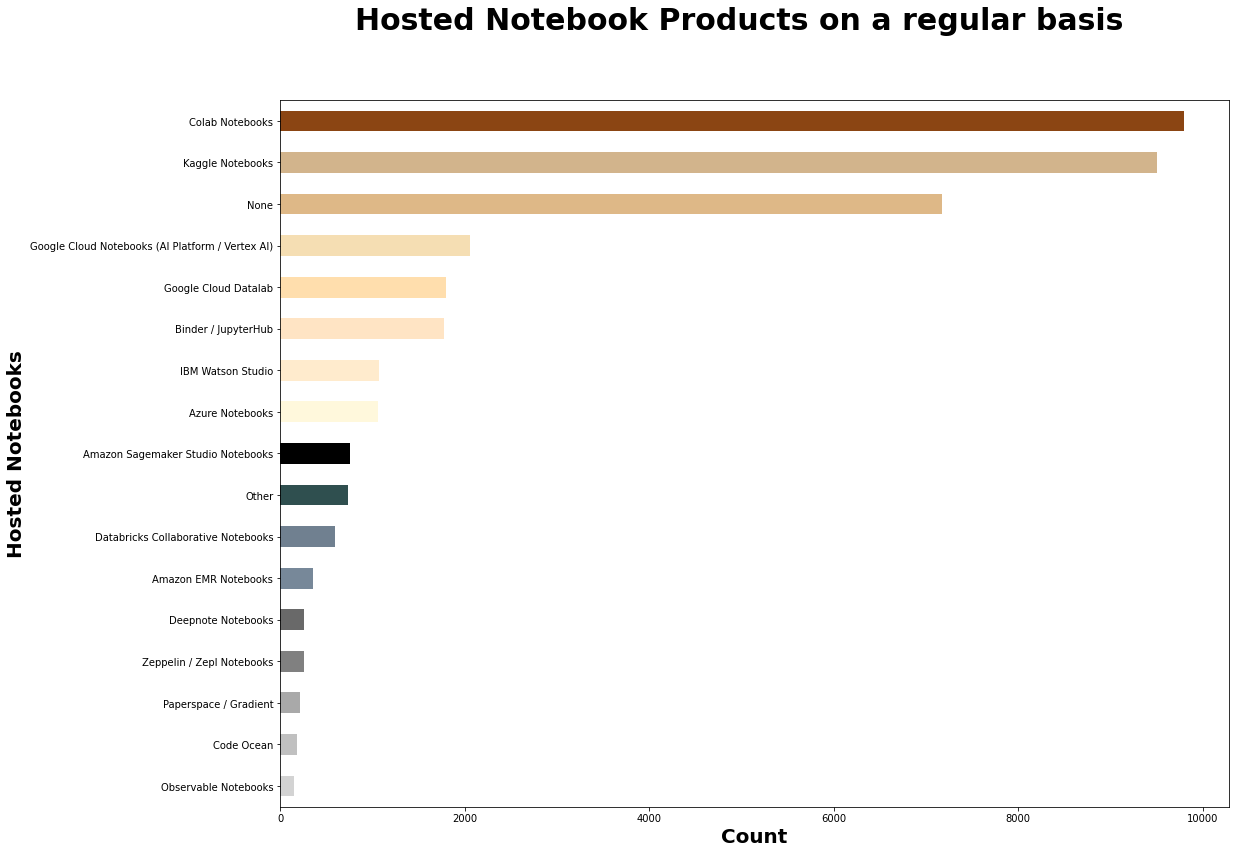

In [15]:
note=df[['Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4', 'Q10_Part_5','Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10', 'Q10_Part_11','Q10_Part_12','Q10_Part_13','Q10_Part_14','Q10_Part_15','Q10_Part_16','Q10_OTHER']]
note.columns=['Kaggle Notebooks' ,'Colab Notebooks' ,'Azure Notebooks', 'Paperspace / Gradient', 'Binder / JupyterHub', 'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio Notebooks' , 'Amazon EMR Notebooks', 'Google Cloud Notebooks (AI Platform / Vertex AI)', 'Google Cloud Datalab', 'Databricks Collaborative Notebooks','Zeppelin / Zepl Notebooks', 'Deepnote Notebooks', 'Observable Notebooks', 'None', 'Other']

colors=['#D3D3D3','#C0C0C0','#A9A9A9','#808080','#696969','#778899','#708090','#2F4F4F','#000000','#FFF8DC','#FFEBCD','#FFE4C4','#FFDEAD','#F5DEB3','#DEB887','#D2B48C','#8B4513']


f, ax = plt.subplots(figsize=(17,13))

note.count().sort_values(ascending=True).plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Courier New',fontsize=20)
plt.ylabel('Hosted Notebooks', weight='semibold', fontname = 'Courier New',fontsize=20)
plt.suptitle('Hosted Notebook Products on a regular basis',fontsize=30,fontname = 'Courier New', weight='bold')


plt.show()

## *Q.What type of computing platform do you use most often for your data science projects?* 

*The computing platform used most often for data science projects is A Laptop.*

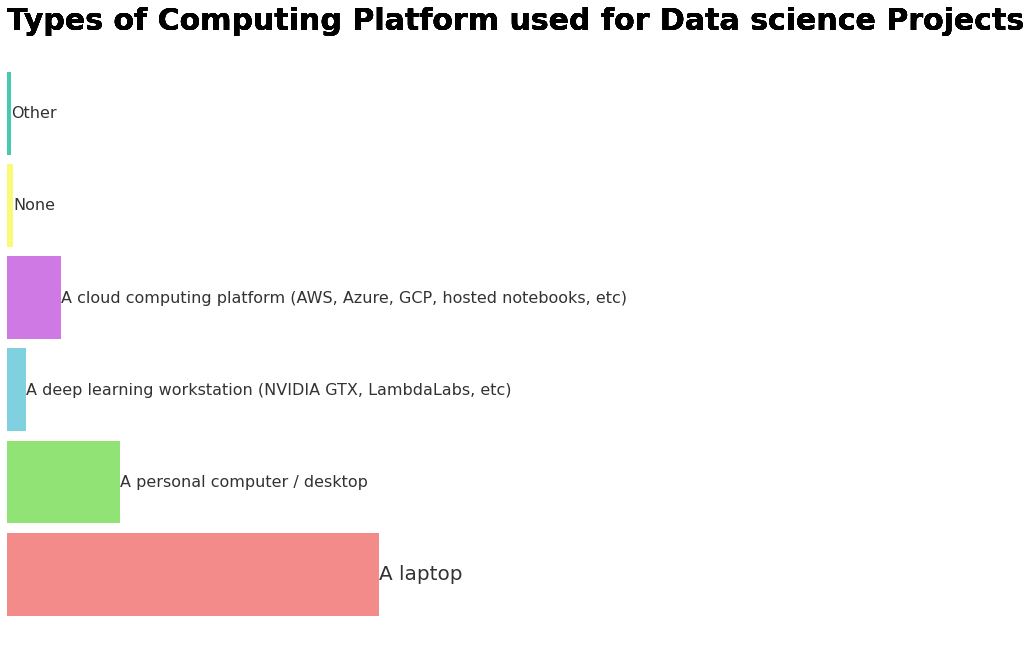

In [16]:
platform=['A laptop','A personal computer / desktop','A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)','A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)','None','Other']
plat_num=[16231,4916,814,2328,259,172]

color=['#F16E6E','#75DC52','#5FC6D9','#C358DE','#F8FA55','#1ABC9C']
fontsize=[20, 16, 16, 16, 16, 16]

x_num=[0,1,2,3,4,5]

fig, axis = plt.subplots(figsize=(7,11))

for i in range(6):
    plt.barh(y=platform[i],height=0.9, width=plat_num[i], color=color[i], alpha=0.8)
    plt.text(s=platform[i],y=x_num[i],x=plat_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Types of Computing Platform used for Data science Projects",x=2,y=6,font='Courier New',  weight='bold', fontsize=30, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

## *Q.Which types of specialized hardware do you use on a regular basis?*

*The most used Specialized Hardware on a regular basis is NVIDIA GPUs. Graphics processing technology has evolved to deliver unique benefits in the world of computing. The latest graphics processing units (GPUs) unlock new possibilities in gaming, content creation, machine learning, and more.*

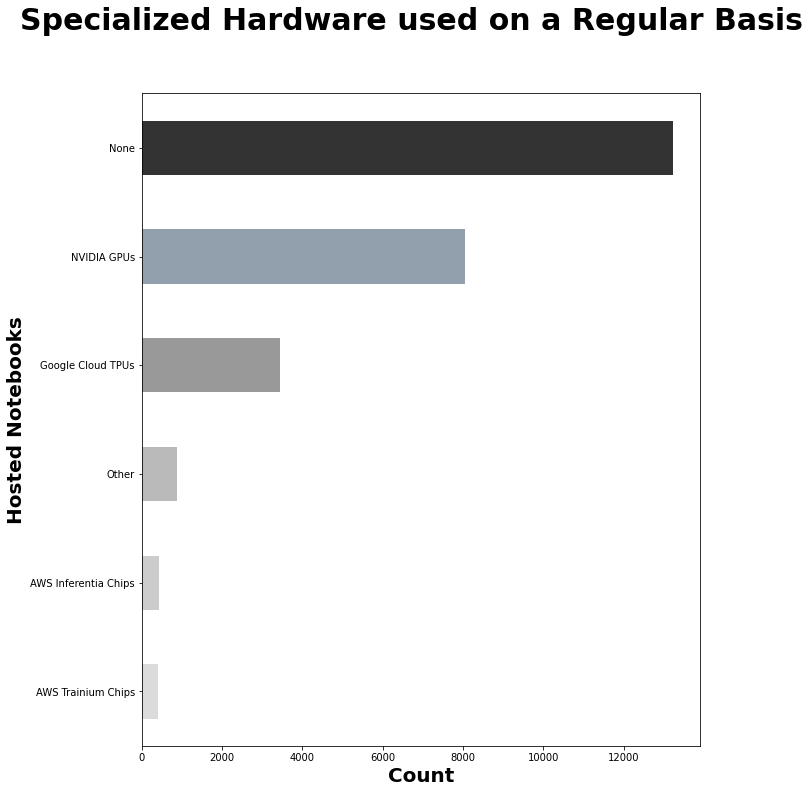

In [17]:
sph=df[['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_Part_4','Q12_Part_5','Q12_OTHER']]
sph.columns=['NVIDIA GPUs','Google Cloud TPUs','AWS Trainium Chips','AWS Inferentia Chips','None','Other']

colors=['#D3D3D3','#C0C0C0','#A9A9A9','#808080','#778899','#000000']

f, ax = plt.subplots(figsize=(10,12))

sph.count().sort_values(ascending=True).plot(kind='barh',color=colors, alpha=0.8)

plt.xlabel('Count', weight='semibold', fontname = 'Courier New',fontsize=20)
plt.ylabel('Hosted Notebooks', weight='semibold', fontname = 'Courier New',fontsize=20)
plt.suptitle('Specialized Hardware used on a Regular Basis',fontsize=30,fontname = 'Courier New', weight='bold')

plt.show()


## *Q.Approximately how many times have you used a TPU (tensor processing unit)?*

*Tensor Processing Units (TPUs) are Google’s custom-developed application-specific integrated circuits (ASICs) used to accelerate machine learning workloads. TPUs are designed from the ground up with the benefit of Google’s deep experience and leadership in machine learning.*

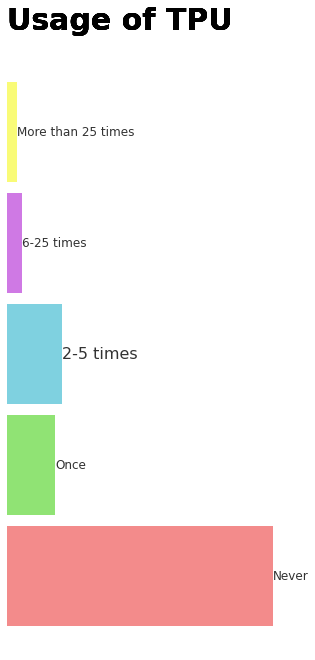

In [18]:
tpu=['Never','Once','2-5 times','6-25 times','More than 25 times']
tpu_num=[16457,2982,3405,947,612]

colors=['#D4E6F1','#AED6F1','#7FB3D5','#2980B9','#1B4F72']

fontsize=[12, 12, 16, 12, 12]
x_num=[0, 1, 2, 3, 4]

f, ax = plt.subplots(figsize=(5,11))

for i in range(5):
    plt.barh(y=tpu[i],height=0.9, width=tpu_num[i], color=color[i], alpha=0.8)
    plt.text(s=tpu[i],y=x_num[i],x=tpu_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Usage of TPU",x=0,y=5,font='Georgia', weight='bold', fontsize=30, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()


> ## *Data Visualization*
*Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.*
*In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.*
*It helps make data easier to  understand.*

## *Q.What data visualization libraries or tools do you use on a regular basis?*

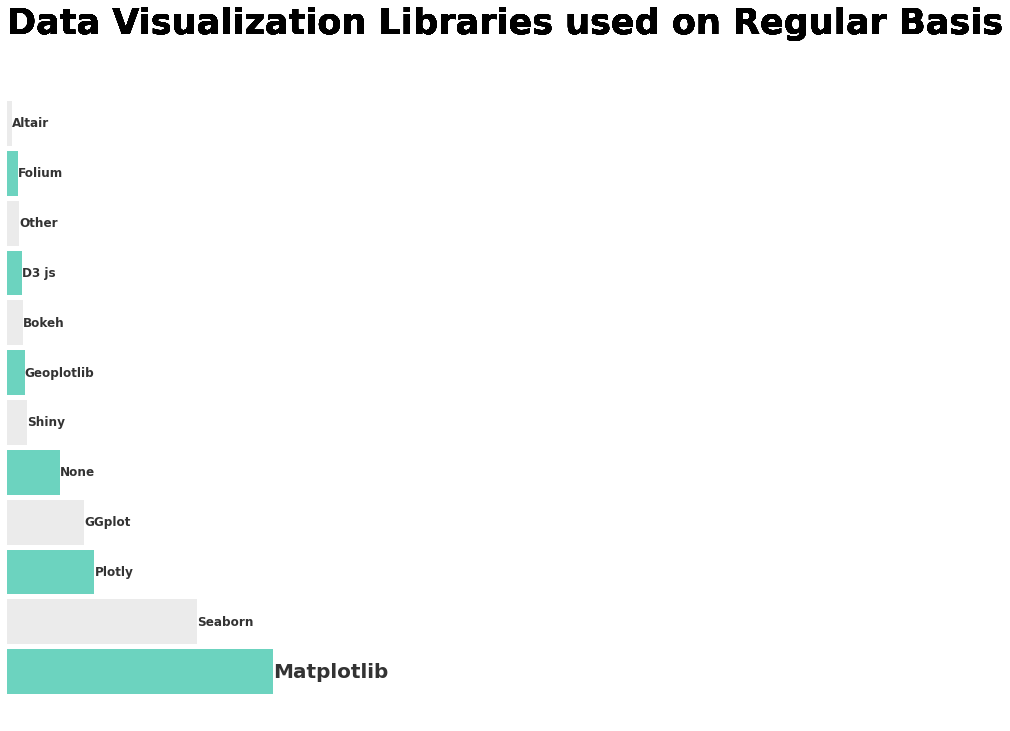

In [19]:
visual = ['Matplotlib','Seaborn','Plotly','GGplot','None','Shiny','Geoplotlib','Bokeh','D3 js','Other','Folium','Altair',]
vl_num = [17595,12586,5778,5100,3479,1322,1148,1050,978,776,716,309]

colors= ['#48C9B0','#E6E6E6','#48C9B0','#E6E6E6','#48C9B0','#E6E6E6','#48C9B0','#E6E6E6','#48C9B0','#E6E6E6','#48C9B0','#E6E6E6']
fontsize=[20, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

f, ax = plt.subplots(figsize=(5,12))

for i in range(12):
    plt.barh(y=visual[i],height=0.9, width=vl_num[i], color=colors[i], alpha=0.8)
    plt.text(s=visual[i],y=x_num[i],x=vl_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], weight='semibold', alpha=0.8)
    plt.text(s="Data Visualization Libraries used on Regular Basis",x=0,y=13,font='Georgia', weight='bold', fontsize=35, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()


> ## *Machine learning*
*Machine learning, refers to a group of techniques used by data scientists that allow computers to learn from data. These techniques produce results that perform well without programming explicit rules.*

> ## *Natural Language Processing(NLP)*
*NLP is a ability of a computer program to understand human language as it is spoken and written. It is a component of artificial intelligence(AI). In other words it helps computers understand, interpret and manipulate human language.*

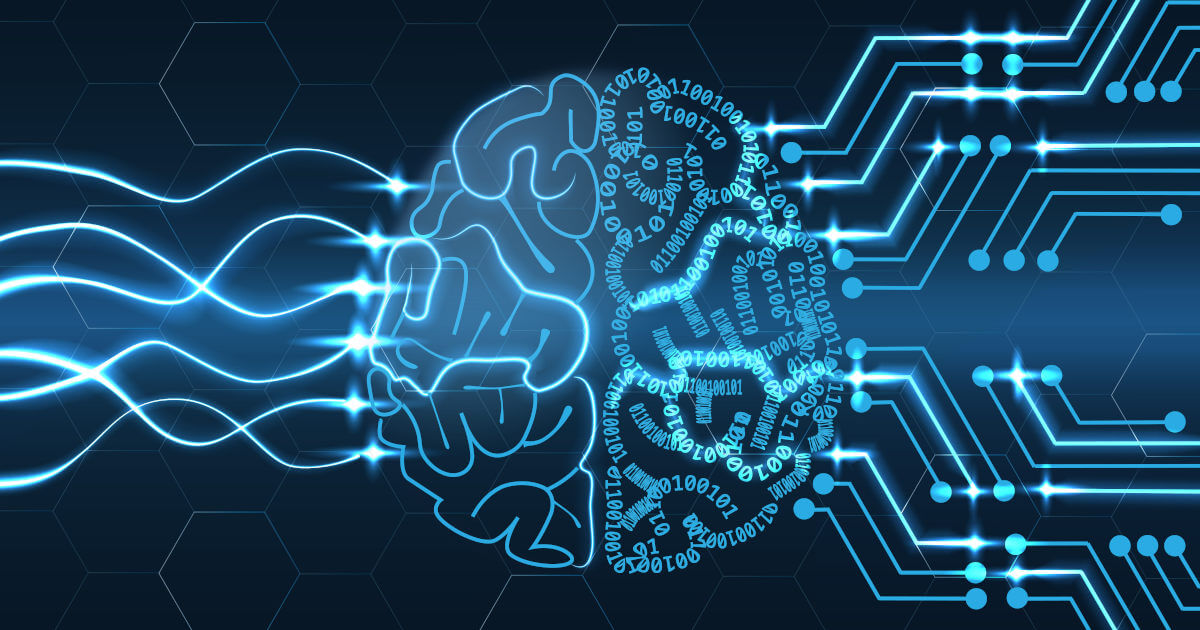](http://)

## *Q.For how many years have you used machine learning methods?*

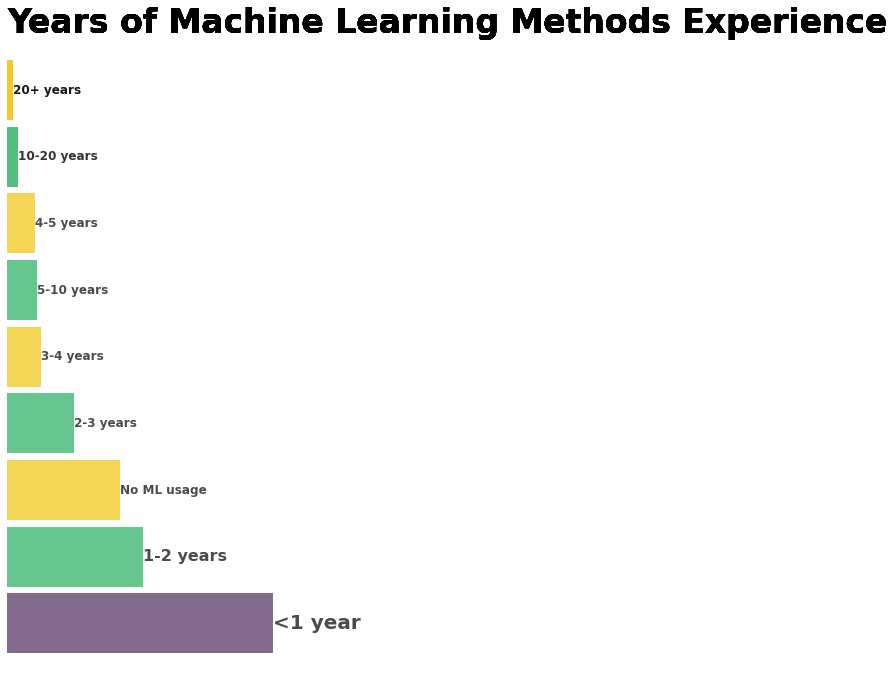

In [20]:
mlm = ['<1 year','1-2 years','No ML usage','2-3 years','3-4 years','5-10 years','4-5 years','10-20 years','20+ years']
mlm_num = [9163,4675,3889,2305,1171,1033,945,362,211]

color=['#512E5F','#27AE60','#F1C40F','#27AE60','#F1C40F','#27AE60','#F1C40F','#27AE60','#F1C40F']

height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.9]

fontsize=[20, 16,12, 12, 12, 12, 12, 12, 12]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8]

f, ax = plt.subplots(figsize=(5,12))

for i in range(9):
    plt.barh(y=mlm[i],height=height[i], width=mlm_num[i], color=color[i], alpha=alpha[i])
    plt.text(s=mlm[i],y=x_num[i],x=mlm_num[i],va='center',ha='left',font='Courier New', weight='semibold',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Years of Machine Learning Methods Experience",x=0,y=9,font='Georgia', weight='bold', fontsize=33, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()

## *Q.Which of the following machine learning frameworks do you use on a regular basis?*

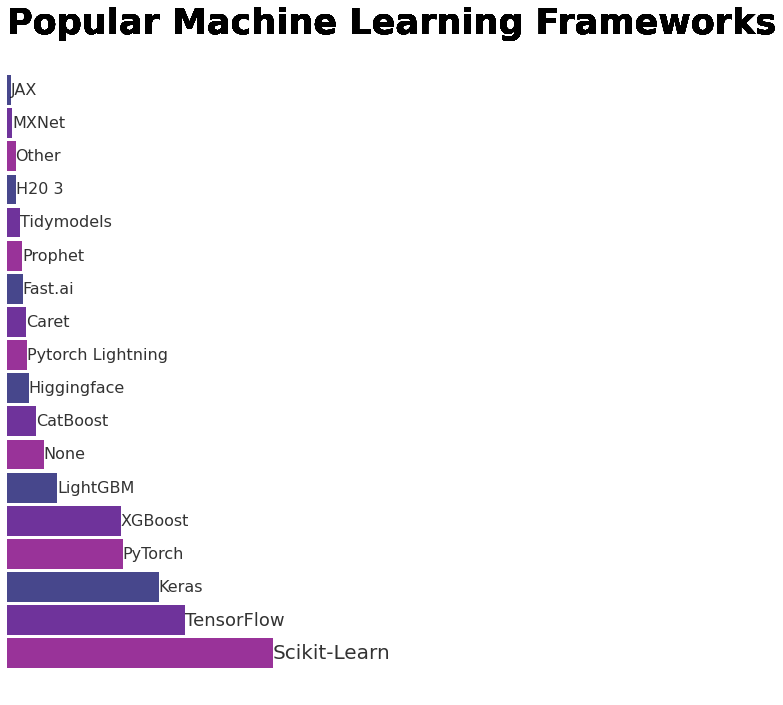

In [21]:
mlf = ['Scikit-Learn','TensorFlow','Keras','PyTorch','XGBoost','LightGBM','None','CatBoost','Higgingface','Pytorch Lightning','Caret',
          'Fast.ai','Prophet','Tidymodels','H20 3','Other','MXNet','JAX']
mlf_num = [13987,9371,7975,6088,5974,2635,1916,1512,1122,1060,1009,824,800,678,488,439,252,190]

color=['#800080','#4B0082','#191970','#800080','#4B0082','#191970','#800080','#4B0082','#191970','#800080','#4B0082','#191970','#800080','#4B0082','#191970','#800080','#4B0082','#191970']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,0.9, 0.9, 0.9, 0.9]

fontsize=[20, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

f, ax = plt.subplots(figsize=(5,12))

for i in range(18):
    plt.barh(y=mlf[i],height=height[i], width=mlf_num[i], color=color[i], alpha=0.8)
    plt.text(s=mlf[i],y=x_num[i],x=mlf_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Popular Machine Learning Frameworks",x=0,y=19,font='Georgia', weight='bold', fontsize=35, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()


* ## *Q.Which of the following ML algorithms do you use on a regular basis?*
* ## *Q.Which categories of computer vision methods do you use on a regular basis?*
* ## *Q.Which of the following natural language processing (NLP) methods do you use on a regular basis?*

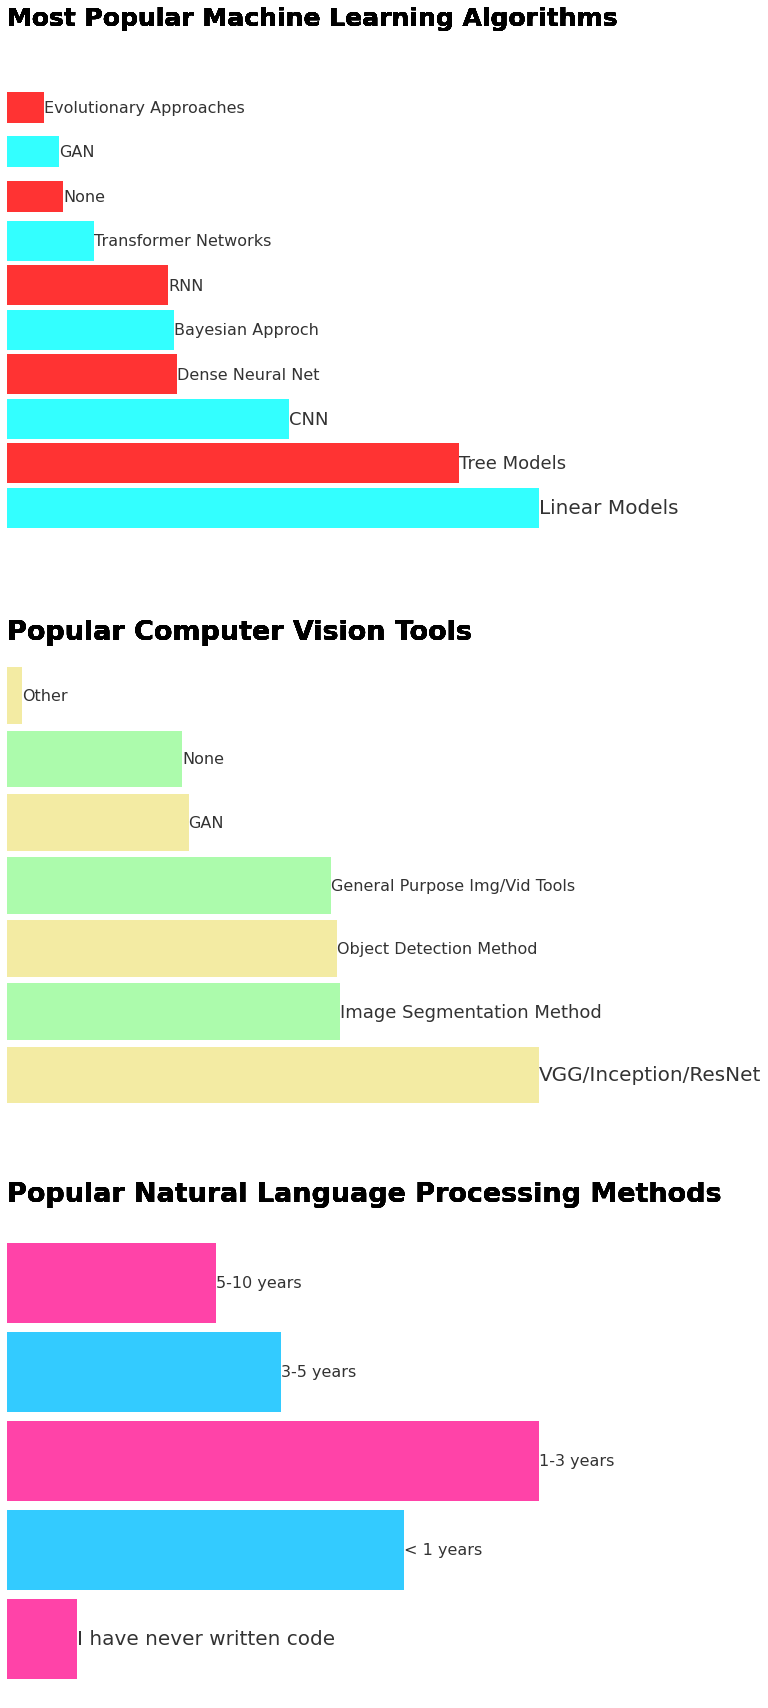

In [22]:
fig, axis = plt.subplots(3, 1, figsize=(10, 30))
#For Q17:
mla = ['Linear Models','Tree Models','CNN','Dense Neural Net','Bayesian Approch','RNN','Transformer Networks','None','GAN','Evolutionary Approaches']
mla_num = [13952,11863,7410,4468,4392,4228,2273,1470,1353,963]

# For Q18:
cvm = ['VGG/Inception/ResNet','Image Segmentation Method','Object Detection Method','General Purpose Img/Vid Tools','GAN','None','Other']
cvm_num = [4373,2740,2716,2662,1492,1439,119]

# For Q19:
nlp = ['Word Embeddings/Vectors','Transformer Lang Tools','Encoder-Decoder Models','None','Contextualized Embeddings']
nlp_num = [2643,2351,2023,1331,748]

##################################################################

color=['#00FFFF','#FF0000','#00FFFF','#FF0000','#00FFFF','#FF0000','#00FFFF','#FF0000','#00FFFF','#FF0000']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.7, 0.7]
alpha=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

fontsize=[20, 18, 18, 16, 16, 16, 16, 16, 16, 16]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


for i in range(10):
    axis[0].barh(y=mla[i],height=height[i], width=mla_num[i], color=color[i], alpha=alpha[i])
    axis[0].text(s=mla[i],y=x_num[i],x=mla_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    axis[0].text(s="Most Popular Machine Learning Algorithms",x=0,y=11,font='Georgia', weight='bold', fontsize=25, va='center',ha='left',color='#000000')
    
gc.collect() # For Memory Optimization

axis[0].axis('off')

##############################################

color=['#F0E68C','#98FB98','#F0E68C','#98FB98','#F0E68C','#98FB98','#F0E68C']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

fontsize=[20, 18, 16, 16, 16, 16, 16]
x_num=[0, 1, 2, 3, 4, 5, 6]

for i in range(7):
    axis[1].barh(y=cvm[i],height=height[i], width=cvm_num[i], color=color[i], alpha=alpha[i])
    axis[1].text(s=cvm[i],y=x_num[i],x=cvm_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    axis[1].text(s="Popular Computer Vision Tools",x=0,y=7,font='Georgia', weight='bold', fontsize=27, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization
axis[1].axis('off')


########################################################################

color=['#FF1493','#00BFFF','#FF1493','#00BFFF','#FF1493']
height=[0.9, 0.9, 0.9, 0.9, 0.9]
alpha=[0.8, 0.8, 0.8, 0.8, 0.8]

fontsize=[20, 16, 16, 16, 16]
x_num=[0, 1, 2, 3, 4]

for i in range(5):
    axis[2].barh(y=experience[i],height=height[i], width=exp_num[i], color=color[i], alpha=alpha[i])
    axis[2].text(s=experience[i],y=x_num[i],x=exp_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=alpha[i])
    axis[2].text(s="Popular Natural Language Processing Methods",x=0,y=5,font='Georgia', weight='bold', fontsize=27, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization

axis[2].axis('off')
plt.show()

## *Q.In what industry is your current employer/contract (or your most recent employer if retired)?*

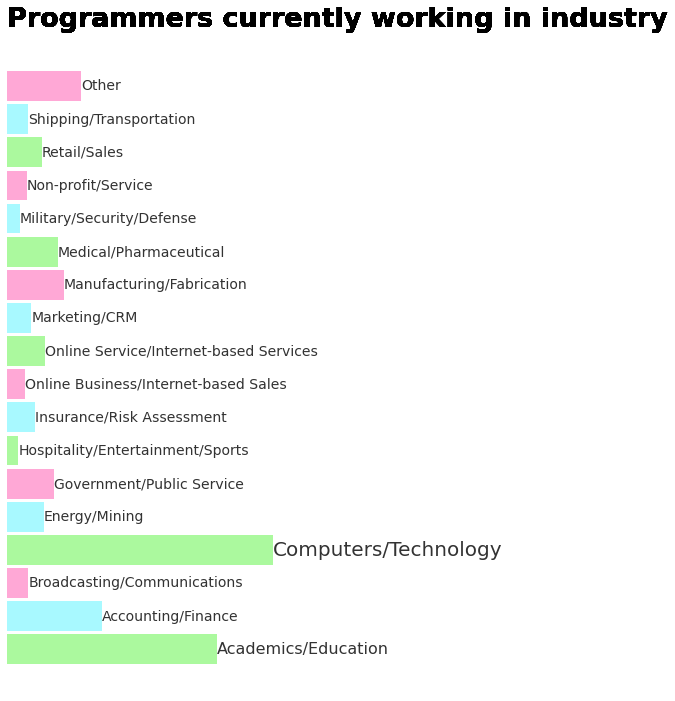

In [23]:
ice=['Academics/Education', 'Accounting/Finance','Broadcasting/Communications','Computers/Technology','Energy/Mining','Government/Public Service','Hospitality/Entertainment/Sports','Insurance/Risk Assessment','Online Business/Internet-based Sales','Online Service/Internet-based Services','Marketing/CRM','Manufacturing/Fabrication','Medical/Pharmaceutical','Military/Security/Defense','Non-profit/Service','Retail/Sales','Shipping/Transportation','Other']
ice_num=[3214,1459,326,4079,558,726,173,424,275,585,373,872,776,197,300,536,316,1136]

color=['#97F886','#93F8FF','#FF93CC','#97F886','#93F8FF','#FF93CC','#97F886','#93F8FF','#FF93CC','#97F886','#93F8FF','#FF93CC','#97F886','#93F8FF','#FF93CC','#97F886','#93F8FF','#FF93CC']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,0.9, 0.9, 0.9, 0.9]

fontsize=[16, 14, 14, 20, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
x_num=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

f, ax = plt.subplots(figsize=(5,12))

for i in range(18):
    plt.barh(y=ice[i],height=height[i], width=ice_num[i], color=color[i], alpha=0.8)
    plt.text(s=ice[i],y=x_num[i],x=ice_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Programmers currently working in industry",x=0,y=19,font='Georgia', weight='bold', fontsize=27, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization


plt.axis('off')
plt.show()


## *Q.What is the size of the company where you are employed?* 
## *Q.Approximately how many individuals are responsible for data science workloads at your place of business?* 

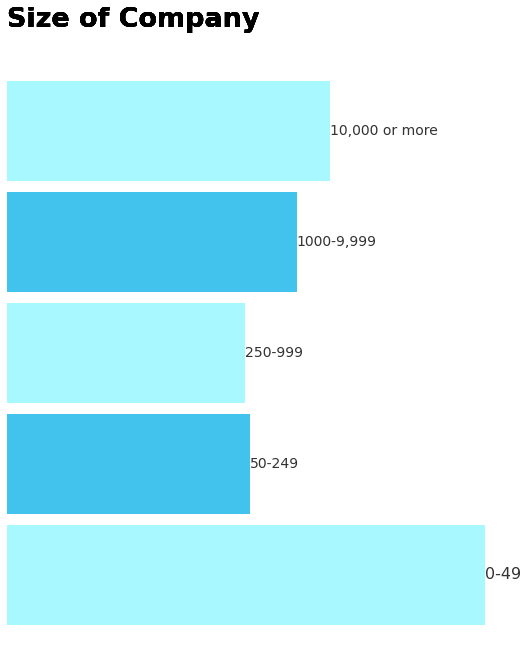

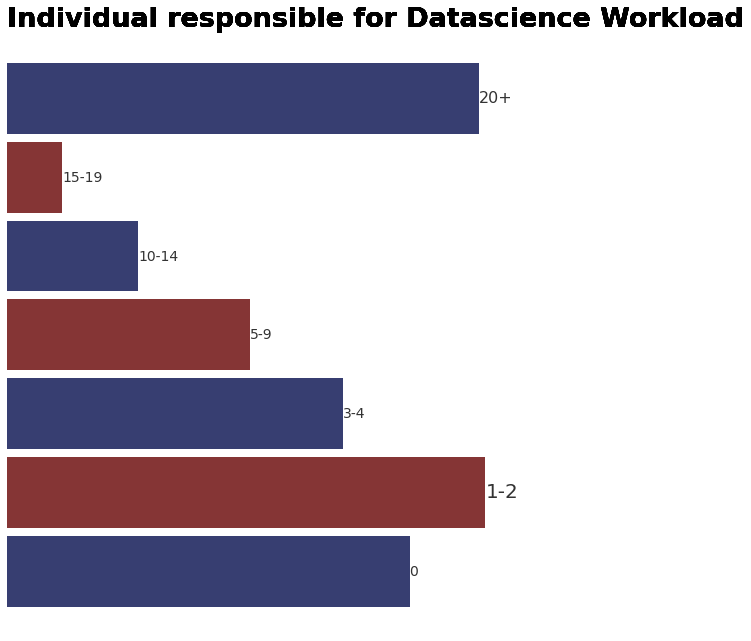

In [24]:
#Q21
emp=[ '0-49','50-249','250-999','1000-9,999','10,000 or more']
emp_num=[5055,2567,2514,3059,3416]

color=['#93F8FF', '#12B5E9','#93F8FF', '#12B5E9','#93F8FF']
height=[0.9, 0.9, 0.9, 0.9, 0.9]

fontsize=[16, 14, 14, 14, 14]
x_num=[0, 1, 2, 3, 4]

f, ax = plt.subplots(figsize=(9,11))

for i in range(5):
    plt.barh(y=emp[i],height=height[i], width=emp_num[i], color=color[i], alpha=0.8)
    plt.text(s=emp[i],y=x_num[i],x=emp_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Size of Company",x=1,y=5,font='Georgia', weight='bold', fontsize=27, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

#Q22
mem=['0','1-2','3-4','5-9','10-14','15-19', '20+']
mem_num=[3064,3642,2558,1850,996,421,3595]
color=['#060E4E','#670303','#060E4E','#670303','#060E4E','#670303','#060E4E']
height=[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

fontsize=[14, 20, 14, 14, 14, 14, 16]
x_num=[0, 1, 2, 3, 4, 5, 6]

f, ax = plt.subplots(figsize=(9,11))

for i in range(7):
    plt.barh(y=mem[i],height=height[i], width=mem_num[i], color=color[i], alpha=0.8)
    plt.text(s=mem[i],y=x_num[i],x=mem_num[i],va='center',ha='left',font='Courier New',fontsize=fontsize[i], alpha=0.8)
    plt.text(s="Individual responsible for Datascience Workload",x=1,y=7,font='Georgia', weight='bold', fontsize=27, va='center',ha='left',color='k')
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()


> ## *Cloud Computing*
*Cloud computing is the delivery of different services through the Internet. These resources include tools and applications like data storage, servers, databases, networking, and software.
Rather than keeping files on a proprietary hard drive or local storage device, cloud-based storage makes it possible to save them to a remote database. As long as an electronic device has access to the web, it has access to the data and the software programs to run it.
Cloud computing is a popular option for people and businesses for a number of reasons including cost savings, increased productivity, speed and efficiency, performance, and security.*

## *Q.Which of the following cloud computing platforms do you use on a regular basis?*

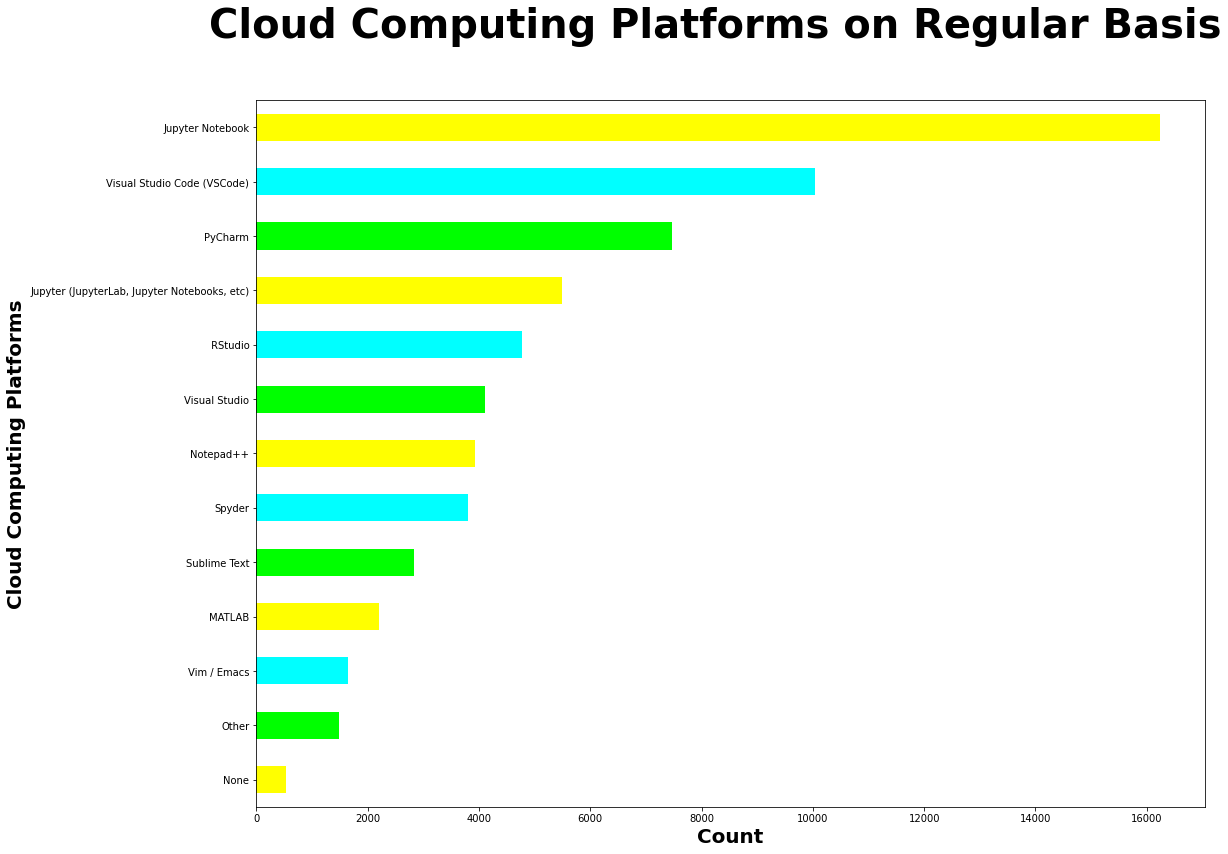

In [25]:
ccp=df[['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER']]
ccp.columns=['Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 'IBM Cloud / Red Hat', 'Oracle Cloud', 'SAP Cloud', 'Salesforce Cloud', 'VMware Cloud', 'Alibaba Cloud', 'Tencent Cloud', 'None', 'Other']

colors=['#FFFF00','#00FF00','#00FFFF','#FFFF00','#00FF00','#00FFFF','#FFFF00','#00FF00','#00FFFF','#FFFF00','#00FF00','#00FFFF']

f, ax = plt.subplots(figsize=(17,13))

ides.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Fixedsys',fontsize=20)
plt.ylabel('Cloud Computing Platforms', weight='semibold', fontname = 'Fixedsys',fontsize=20)
plt.suptitle('Cloud Computing Platforms on Regular Basis', fontname = 'Fixedsys',fontsize=40, weight='bold')


plt.show()

> ## *Data Storage*
*Data storage refers to the use of recording media to retain data using computers or other devices. The most prevalent forms of data storage are file storage, block storage, and object storage, with each being ideal for different purposes.Data storage makes it easy to back up files for safekeeping and quick recovery in the event of an unexpected computing crash or cyberattack. Data storage can occur on physical hard drives, disk drives, USB drives or virtually in the cloud.*

## *Q.Do you use any of the following data storage products on a regular basis?*

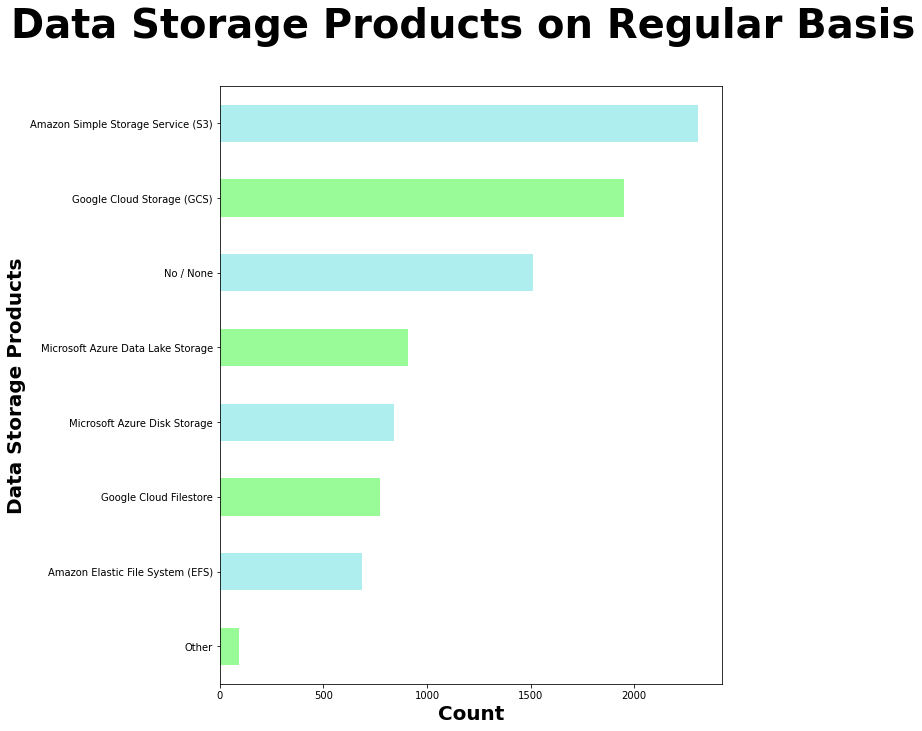

In [26]:
ds=df[['Q30_A_Part_1', 'Q30_A_Part_2', 'Q30_A_Part_3', 'Q30_A_Part_4', 'Q30_A_Part_5', 'Q30_A_Part_6', 'Q30_A_Part_7', 'Q30_A_OTHER']]
ds.columns=['Microsoft Azure Data Lake Storage', 'Microsoft Azure Disk Storage', 'Amazon Simple Storage Service (S3)', 'Amazon Elastic File System (EFS)', 'Google Cloud Storage (GCS)', 'Google Cloud Filestore', 'No / None', 'Other']

colors=['#98FB98', '#AFEEEE', '#98FB98', '#AFEEEE', '#98FB98', '#AFEEEE', '#98FB98', '#AFEEEE']

f, ax = plt.subplots(figsize=(9,11))
ds.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.ylabel('Data Storage Products', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.suptitle('Data Storage Products on Regular Basis', fontname = 'MS Sans Serif',fontsize=40, weight='bold')


plt.show()

> ## *Big Data*
*Big data is a term that describes large, hard-to-manage volumes of data – both structured and unstructured – that inundate businesses on a day-to-day basis. Big data can be analyzed for insights that improve decisions and give confidence for making strategic business moves. Big data is a combination of structured, semistructured and unstructured data collected by organizations that can be mined for information and used in machine learning projects, predictive modeling and other advanced analytics applications.*

## *Q.Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?*

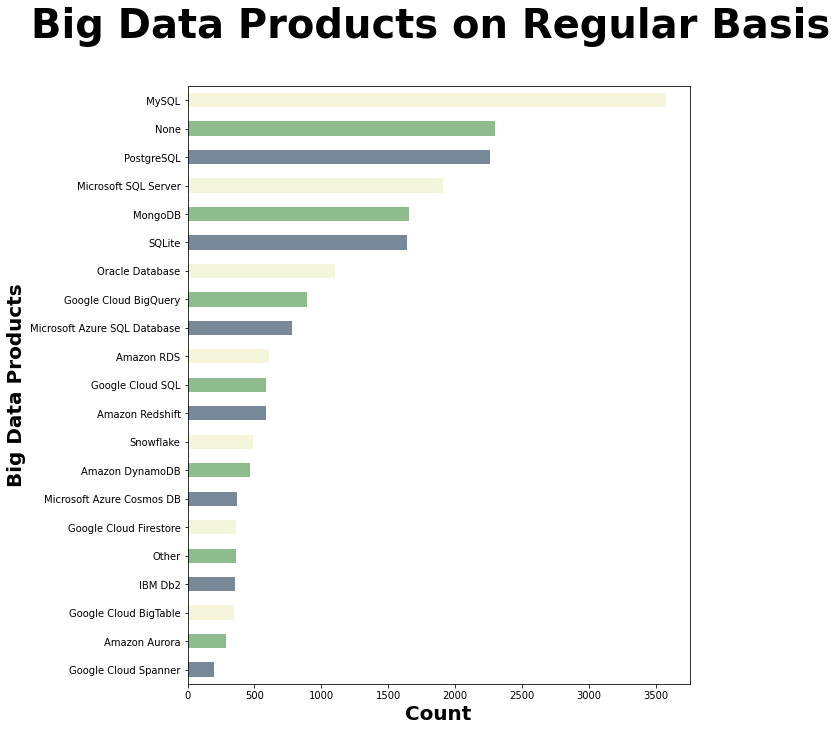

In [27]:
bdp =df[['Q32_A_Part_1','Q32_A_Part_2','Q32_A_Part_3','Q32_A_Part_4','Q32_A_Part_5','Q32_A_Part_6','Q32_A_Part_7','Q32_A_Part_8','Q32_A_Part_9','Q32_A_Part_10','Q32_A_Part_11','Q32_A_Part_12','Q32_A_Part_13','Q32_A_Part_14', 'Q32_A_Part_15', 'Q32_A_Part_16', 'Q32_A_Part_17', 'Q32_A_Part_18','Q32_A_Part_19','Q32_A_Part_20', 'Q32_A_OTHER']]
bdp.columns=[' MySQL', 'PostgreSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server', 'Microsoft Azure SQL Database', 'Microsoft Azure Cosmos DB', 'Amazon Redshift', 'Amazon Aurora', 'Amazon RDS', 'Amazon DynamoDB', 'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'Google Cloud BigTable', 'Google Cloud Spanner', 'None', 'Other']

colors=['#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC','#778899','#8FBC8F','#F5F5DC']

f, ax = plt.subplots(figsize=(9,11))
bdp.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.ylabel('Big Data Products', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.suptitle('Big Data Products on Regular Basis', fontname = 'MS Sans Serif',fontsize=40, weight='bold')

plt.show()

> ## *Bussiness Intelligence Tools*
*Business intelligence (BI) tools are types of application software which collect and process large amounts of unstructured data from internal and external systems, including books, journals, documents, health records, images, files, email, video and other business sources. While not as flexible as business analytics tools, BI tools provide a way of amassing data to find information primarily through queries. These tools also help prepare data for analysis so that you can create reports, dashboards and data visualisations. The results give both employees and managers the power to accelerate and improve decision making, increase operational efficiency, pinpoint new revenue potentials, identify market trends, report genuine KPIs and identify new business opportunities.*

## *Q.Which of the following business intelligence tools do you use on a regular basis?*

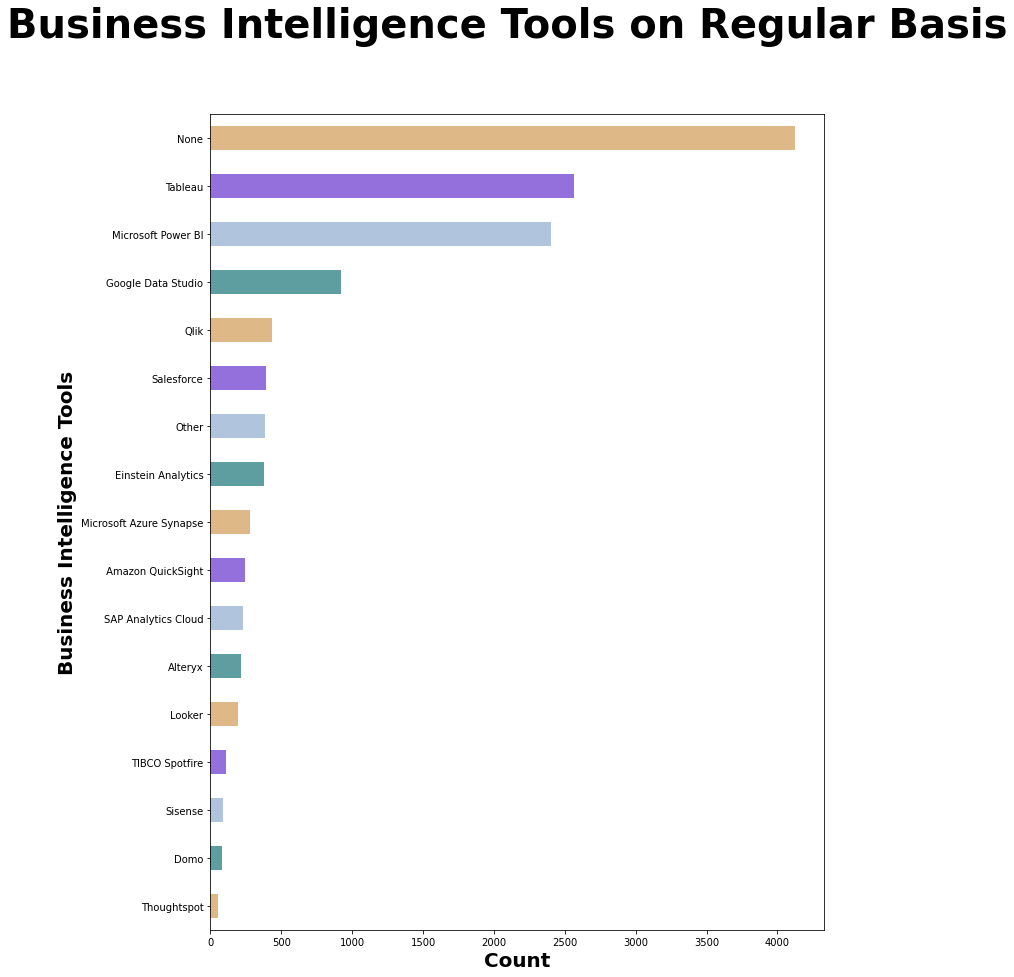

In [28]:
bit =df[['Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q34_A_Part_11', 'Q34_A_Part_12', 'Q34_A_Part_13', 'Q34_A_Part_14', 'Q34_A_Part_15', 'Q34_A_Part_16', 'Q34_A_OTHER']]
bit.columns=[' Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud', 'Microsoft Azure Synapse', 'Thoughtspot', 'None', 'Other']

colors=['#DEB887', '#5F9EA0', '#B0C4DE', '#9370DB', '#DEB887', '#5F9EA0', '#B0C4DE', '#9370DB', '#DEB887', '#5F9EA0', '#B0C4DE', '#9370DB', '#DEB887', '#5F9EA0', '#B0C4DE', '#9370DB', '#DEB887']

f, ax = plt.subplots(figsize=(11,15))
bit.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.ylabel('Business Intelligence Tools', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.suptitle('Business Intelligence Tools on Regular Basis', fontname = 'MS Sans Serif',fontsize=40, weight='bold')

plt.show()

> ## *Automated Machine Learning (AutoML)*
*Automated Machine Learning provides methods and processes to make Machine Learning available for non-Machine Learning experts, to improve efficiency of Machine Learning and to accelerate research on Machine Learning.
Machine learning (ML) has achieved considerable successes in recent years and an ever-growing number of disciplines rely on it. However, this success crucially relies on human machine learning experts to perform the following tasks:
Preprocess and clean the data,
Select and construct appropriate features,
Select an appropriate model family,
Optimize model hyperparameters,
Design the topology of neural networks (if deep learning is used),
Postprocess machine learning models,
Critically analyze the results obtained,
As the complexity of these tasks is often beyond non-ML-experts, the rapid growth of machine learning applications has created a demand for off-the-shelf machine learning methods that can be used easily and without expert knowledge. We call the resulting research area that targets progressive automation of machine learning AutoML.*

## *Q.Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?*

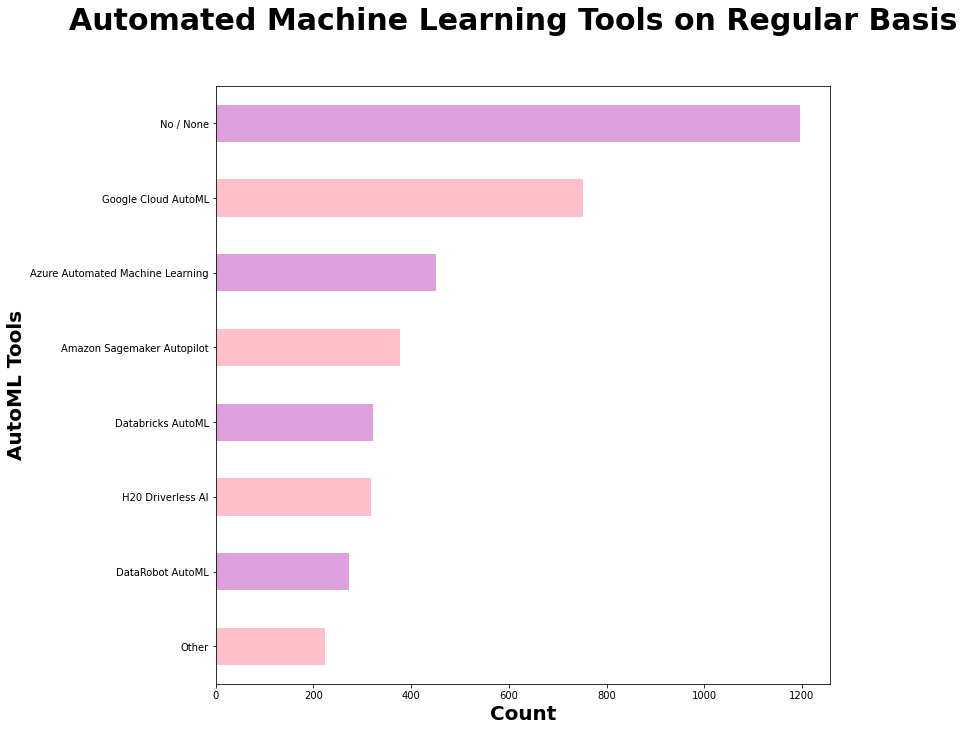

In [29]:
aml=df[['Q37_A_Part_1', 'Q37_A_Part_2', 'Q37_A_Part_3', 'Q37_A_Part_4', 'Q37_A_Part_5', 'Q37_A_Part_6', 'Q37_A_Part_7', 'Q37_A_OTHER']]
aml.columns=['Google Cloud AutoML', 'H20 Driverless AI', 'Databricks AutoML', 'DataRobot AutoML', 'Amazon Sagemaker Autopilot', 'Azure Automated Machine Learning', 'No / None', 'Other']

colors=['#FFC0CB','#DDA0DD','#FFC0CB','#DDA0DD','#FFC0CB','#DDA0DD','#FFC0CB','#DDA0DD']

f, ax = plt.subplots(figsize=(11,11))
aml.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.ylabel('AutoML Tools', weight='semibold', fontname = 'Verdana',fontsize=20)
plt.suptitle('Automated Machine Learning Tools on Regular Basis', fontname = 'MS Sans Serif',fontsize=30, weight='bold')

plt.show()


## *Q.On which platforms have you begun or completed data science courses?*

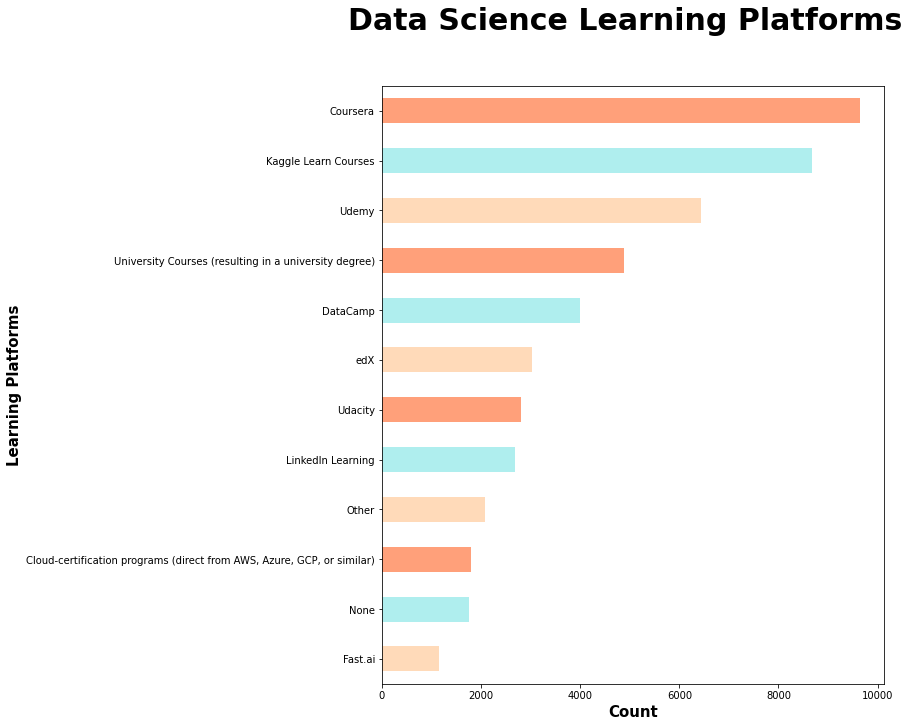

In [30]:
lp=df[['Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11', 'Q40_OTHER']]
lp.columns=['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)', 'University Courses (resulting in a university degree)', 'None', 'Other']


colors=['#FFDAB9', '#AFEEEE', '#FFA07A', '#FFDAB9', '#AFEEEE', '#FFA07A', '#FFDAB9', '#AFEEEE', '#FFA07A', '#FFDAB9', '#AFEEEE', '#FFA07A']

f, ax = plt.subplots(figsize=(9,11))
lp.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=15)
plt.ylabel('Learning Platforms', weight='semibold', fontname = 'Verdana',fontsize=15)
plt.suptitle('Data Science Learning Platforms', fontname = 'MS Sans Serif',fontsize=30, weight='bold')


plt.show()

## *Q.Who/what are your favorite media sources that report on data science topics?* 

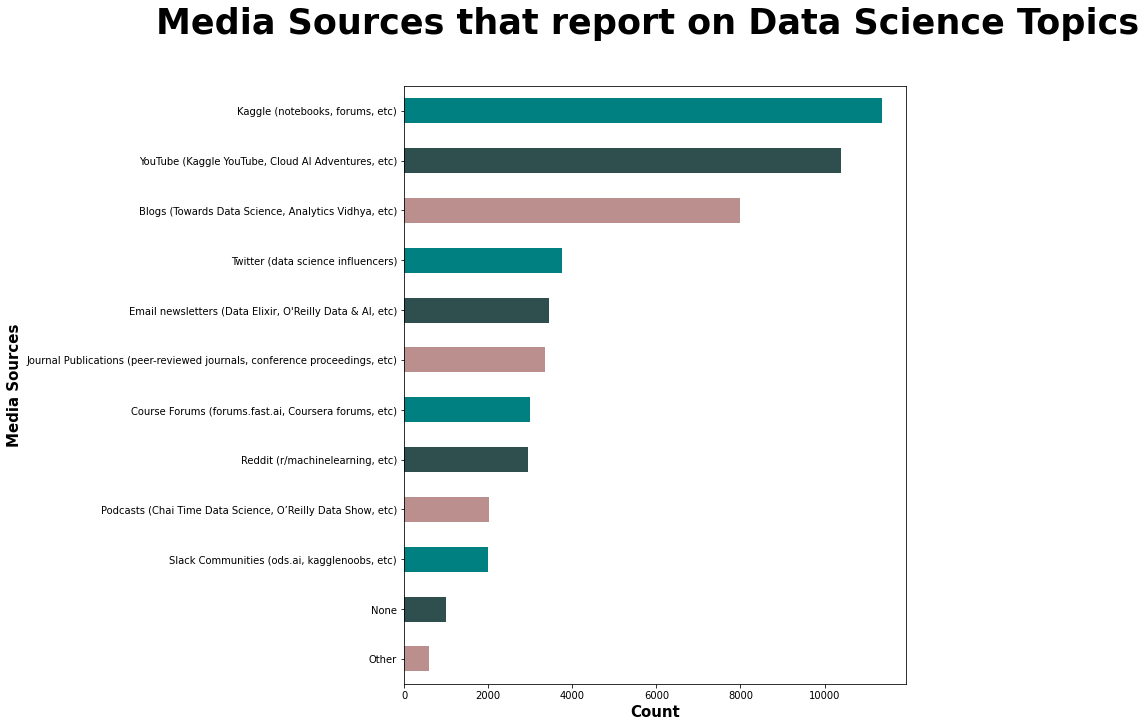

In [31]:
ms=df[['Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4', 'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9', 'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER']]
ms.columns=['Twitter (data science influencers)', "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)", 'Reddit (r/machinelearning, etc)', 'Kaggle (notebooks, forums, etc)', 'Course Forums (forums.fast.ai, Coursera forums, etc)', 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)', 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)', 'Blogs (Towards Data Science, Analytics Vidhya, etc)', 'Journal Publications (peer-reviewed journals, conference proceedings, etc)', 'Slack Communities (ods.ai, kagglenoobs, etc)', 'None', 'Other']


colors=['#BC8F8F', '#2F4F4F', '#008080', '#BC8F8F', '#2F4F4F', '#008080', '#BC8F8F', '#2F4F4F', '#008080', '#BC8F8F', '#2F4F4F', '#008080']

f, ax = plt.subplots(figsize=(9,11))
ms.count().sort_values().plot(kind='barh',color=colors)

plt.xlabel('Count', weight='semibold', fontname = 'Verdana',fontsize=15)
plt.ylabel('Media Sources', weight='semibold', fontname = 'Verdana',fontsize=15)
plt.suptitle('Media Sources that report on Data Science Topics', fontname = 'MS Sans Serif',fontsize=35, weight='bold')


plt.show()

# ***THE END***